# **Yelp Dataset**
Download dataset [here](https://www.yelp.com/dataset/download).

Dataset Link: 
https://www.yelp.com/dataset

| File            | Description                                                                                                                                                                 |
|-----------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `business.json` | Contains business data including location data, attributes, and categories.                                                                                                |
| `review.json`   | Contains full review text data including the user_id that wrote the review and the business_id the review is written for.                                                  |
| `user.json`     | User data including the user's friend mapping and all the metadata associated with the user.                                                                               |
| `checkin.json`  | Checkins on a business.                                                                                                                                                     |
| `tip.json`      | Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.                                                                   |

Reference: https://github.com/ahegel/yelp-dataset

Official sample project from Yelp: [here](https://github.com/Yelp/dataset-examples)

In [1]:
import pandas as pd
import json
import numpy as np
import pandas as pd


In [54]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade setuptools

In [ ]:
pip install mlxtend  

## **1. Check-In.json**

In [2]:
#checkin_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/yelp_academic_dataset_checkin.json'
checkin_json_file_path = 'yelp_academic_dataset_checkin.json'

# List to store data from JSON file
checkin_data_list = []

# Open and read the JSON file line by line
with open(checkin_json_file_path, 'r') as file:
    for checkin_line in file:
        try:
            # Load each JSON object into a Python dictionary
            checkin_data = json.loads(checkin_line)
            checkin_data_list.append(checkin_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
checkin_df = pd.DataFrame(checkin_data_list)

checkin_df

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [3]:
checkin_df.isna().sum()

business_id    0
date           0
dtype: int64

Below's dataframe is for each businessId, the number of check-ins for each hour of the day. Please note that "0" is midnight, "12" is noon, "13" is 1 PM, and so on up to "23" which is 11 PM.

In [4]:
# create a list of date-time strings
checkin_df['date_times_list'] = checkin_df['date'].str.split(', ')

# have each date-time as a separate row
checkin_df_exploded = checkin_df.explode('date_times_list')

# Convert the 'date_times_list' to datetime objects
checkin_df_exploded['date_times_list'] = pd.to_datetime(checkin_df_exploded['date_times_list'], errors='coerce')

# create new columns 'hour' and 'day_of_week'
checkin_df_exploded['hour'] = checkin_df_exploded['date_times_list'].dt.hour
checkin_df_exploded['day_of_week'] = checkin_df_exploded['date_times_list'].dt.day_name()

# get hours as columns with a count of check-ins per hour for each day of the week
checkin_df_exploded['count'] = 1
checkin_hourly_ext = checkin_df_exploded.pivot_table(index='business_id', columns=['day_of_week', 'hour'], values='count', aggfunc='sum', fill_value=0)

checkin_hourly_ext.columns = [' '.join([str(col) for col in cols]) for cols in checkin_hourly_ext.columns.values]

# add 'business_id' column again
checkin_hourly_ext.reset_index(inplace=True)

checkin_hourly_ext.head()

,business_id,Friday 0,Friday 1,Friday 2,Friday 3,Friday 4,Friday 5,Friday 6,Friday 7,Friday 8,...,Wednesday 14,Wednesday 15,Wednesday 16,Wednesday 17,Wednesday 18,Wednesday 19,Wednesday 20,Wednesday 21,Wednesday 22,Wednesday 23
0,---kPU91CF4Lq2-WlRu9Lw,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,--0iUa4sNDFiZFrAdIWhZQ,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,--30_8IhuyMHbSOcNWd6DQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,--7PUidqRWpRSpXebiyxTg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,--7jw19RH9JKXgFohspgQw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Below's dataframe showed the aggregate number of check-ins for each hour.

In [5]:
checkin_df['date_times_list'] = checkin_df['date'].str.split(', ')

checkin_df = checkin_df.explode('date_times_list')

checkin_df['date_times_list'] = pd.to_datetime(checkin_df['date_times_list'], errors='coerce')

# create a new column 'hour'
checkin_df['hour'] = checkin_df['date_times_list'].dt.hour

# get hours as columns with a count of check-ins per hour
checkin_df['count'] = 1
checkin_hourly = checkin_df.pivot_table(index='business_id', columns='hour', values='count', aggfunc='sum', fill_value=0)

if isinstance(checkin_hourly.columns, pd.MultiIndex):
    checkin_hourly.columns = checkin_hourly.columns.droplevel(0)

# add 'business_id' to become a column again
checkin_hourly = checkin_hourly.reset_index()

checkin_hourly.columns = ['business_id'] + [f'hour_{col}' if isinstance(col, int) else col for col in checkin_hourly.columns[1:]]

In [6]:
checkin_hourly.head()

,business_id,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,---kPU91CF4Lq2-WlRu9Lw,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,6,2,0
1,--0iUa4sNDFiZFrAdIWhZQ,2,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,1,1,2
2,--30_8IhuyMHbSOcNWd6DQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,--7PUidqRWpRSpXebiyxTg,0,0,2,0,0,0,0,2,0,...,0,2,1,1,0,0,0,0,0,0
4,--7jw19RH9JKXgFohspgQw,0,0,0,0,0,0,0,0,0,...,5,3,2,0,1,3,3,1,0,1


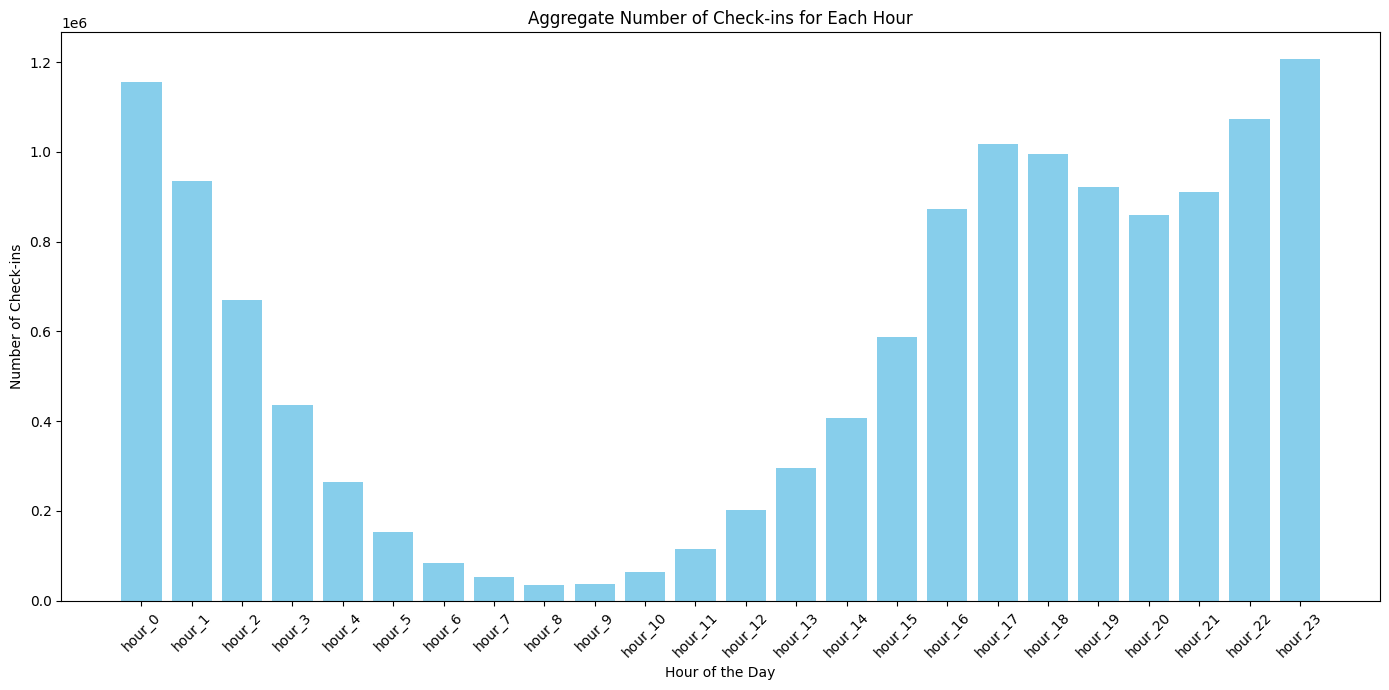

In [7]:
import matplotlib.pyplot as plt


checkin_hourly.drop('business_id', axis=1, inplace=True)

hourly_sums = checkin_hourly.sum()

plt.figure(figsize=(14, 7))
plt.bar(hourly_sums.index, hourly_sums.values, color='skyblue')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Check-ins')
plt.title('Aggregate Number of Check-ins for Each Hour')
plt.xticks(rotation=45)

# to avoid overlapping 
plt.tight_layout()
plt.show()

## **2. Tip.json**

In [8]:
#tip_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/yelp_academic_dataset_tip.json'
tip_json_file_path = 'yelp_academic_dataset_tip.json'

# List to store data from JSON file
tip_data_list = []

# Open and read the JSON file line by line
with open(tip_json_file_path, 'r') as file:
    for tip_line in file:
        try:
            # Load each JSON object into a Python dictionary
            tip_data = json.loads(tip_line)
            tip_data_list.append(tip_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
tip_df = pd.DataFrame(tip_data_list)

tip_df

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [9]:
tip_df.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

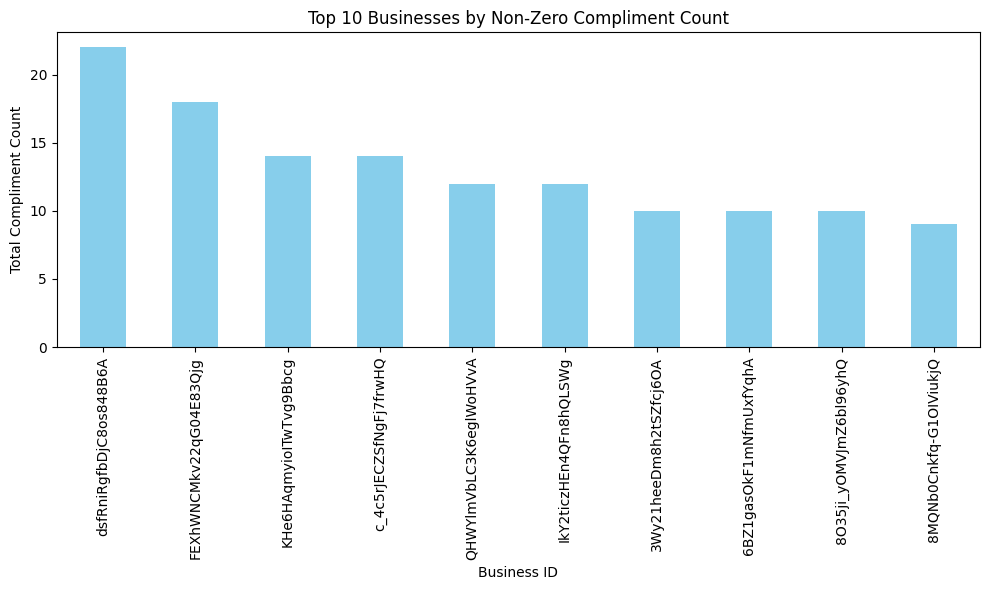

In [10]:
# filter out the non-zero compliment count
non_zero_compliments = tip_df[tip_df['compliment_count'] > 0]

# group by business_id and sum the compliment counts
business_compliments = non_zero_compliments.groupby('business_id')['compliment_count'].sum().sort_values()

# get the first 10
top_10_business_compliments = business_compliments.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_business_compliments.plot(kind='bar', color='skyblue')

plt.title('Top 10 Businesses by Non-Zero Compliment Count')
plt.xlabel('Business ID')
plt.ylabel('Total Compliment Count')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## **3. User.json**

In [11]:
#user_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/yelp_academic_dataset_user.json'
user_json_file_path = 'yelp_academic_dataset_user.json'

# List to store data from JSON file
user_data_list = []

# Open and read the JSON file line by line
with open(user_json_file_path, 'r') as file:
    for user_line in file:
        try:
            # Load each JSON object into a Python dictionary
            user_data = json.loads(user_line)
            user_data_list.append(user_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
user_df = pd.DataFrame(user_data_list)

user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [12]:
user_df.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [13]:
# Assuming 'user_df' is your DataFrame and has been read into the environment properly.
# For the purpose of this example, we will create a mock DataFrame with a similar structure.

# For each type of count, find the top 10 users including their names
top_useful = user_df.nlargest(10, 'useful')[['user_id', 'name', 'useful']]
top_funny = user_df.nlargest(10, 'funny')[['user_id', 'name', 'funny']]
top_cool = user_df.nlargest(10, 'cool')[['user_id', 'name', 'cool']]

# Displaying the top 10 for each category
print("Top 10 Users for 'Useful' Compliments:")
print(top_useful)
print("\nTop 10 Users for 'Funny' Compliments:")
print(top_funny)
print("\nTop 10 Users for 'Cool' Compliments:")
print(top_cool)



Top 10 Users for 'Useful' Compliments:
                       user_id      name  useful
17169   Hi10sGSZNxQH3NLyWSZ1oA       Fox  206296
207385  --2vR0DIsmQ6WfcSzKWigw    Harald  205765
200787  JjXuiru1_ONzDkYVrHN0aw   Richard  183512
223840  lvthTfCQGD0qaEk6jCdRdQ     Ariel  182788
4723    hWDybu_KvYLSdEFzGrniTw     Bruce  173089
795339  8k3aO-mPeyhbR5HUucA5aA    Victor  152979
207620  Kf5PVQUdDvQYf-MXoeWqZA  Marianne  142453
2216    AbMjnKOwg736fcIu8apuyQ   Michael  124311
842189  7W-p-PJlmrzg0mk3pWKoyQ    Arshad  117066
800350  ax7SnXOTIpatbsmqHLqVow    Rohlin  112557

Top 10 Users for 'Funny' Compliments:
                       user_id      name   funny
17169   Hi10sGSZNxQH3NLyWSZ1oA       Fox  185823
207385  --2vR0DIsmQ6WfcSzKWigw    Harald  173096
200787  JjXuiru1_ONzDkYVrHN0aw   Richard  129638
800350  ax7SnXOTIpatbsmqHLqVow    Rohlin  103618
4723    hWDybu_KvYLSdEFzGrniTw     Bruce   98459
842189  7W-p-PJlmrzg0mk3pWKoyQ    Arshad   96505
2216    AbMjnKOwg736fcIu8apuyQ   Michael

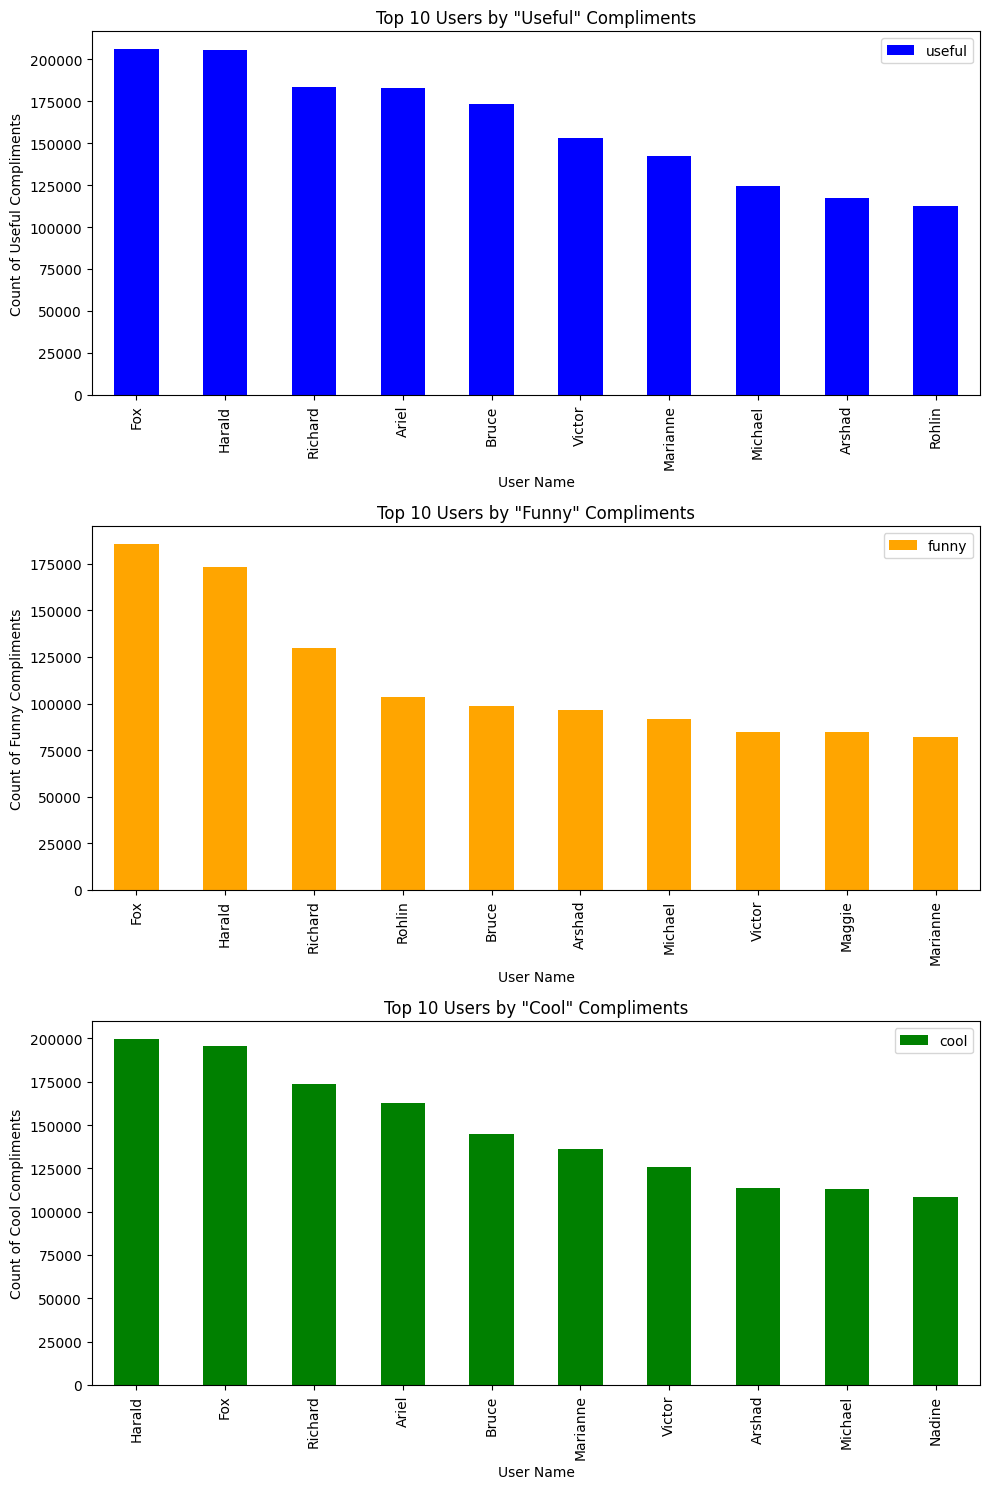

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 'useful'
top_useful.plot(kind='bar', x='name', y='useful', ax=axes[0], color='blue')
axes[0].set_title('Top 10 Users by "Useful" Compliments')
axes[0].set_xlabel('User Name')
axes[0].set_ylabel('Count of Useful Compliments')

# 'funny'
top_funny.plot(kind='bar', x='name', y='funny', ax=axes[1], color='orange')
axes[1].set_title('Top 10 Users by "Funny" Compliments')
axes[1].set_xlabel('User Name')
axes[1].set_ylabel('Count of Funny Compliments')

# 'cool'
top_cool.plot(kind='bar', x='name', y='cool', ax=axes[2], color='green')
axes[2].set_title('Top 10 Users by "Cool" Compliments')
axes[2].set_xlabel('User Name')
axes[2].set_ylabel('Count of Cool Compliments')

plt.tight_layout()
plt.show()

## **4. Review.json**

In [15]:
#review_json_file_path = '/content/drive/MyDrive/BA820 Unsupervised and Unstructured Machine Learning/Yelp Dataset/'yelp_academic_dataset_review.json'
review_json_file_path = 'yelp_academic_dataset_review.json'

# List to store data from JSON file
review_data_list = []

# Open and read the JSON file line by line
with open(review_json_file_path, 'r') as file:
    for review_line in file:
        try:
            # Load each JSON object into a Python dictionary
            review_data = json.loads(review_line)
            review_data_list.append(review_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of dictionaries into a DataFrame
review_df = pd.DataFrame(review_data_list)

# Print only the first 3 rows of the DataFrame
review_df


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [16]:
review_df.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

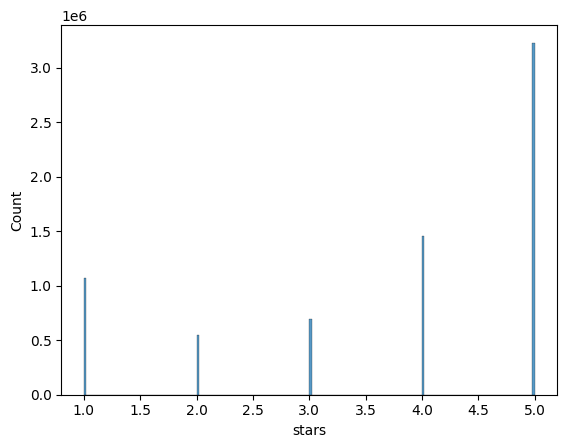

In [17]:
import seaborn as sns

sns.histplot(review_df['stars'], kde=False)

plt.show()

## **5. Business.json**

In [18]:
# load and preview the data
bus = []
with open('yelp_academic_dataset_business.json') as f:
    for line in f:
        bus.append(json.loads(line))
bus = pd.DataFrame.from_dict(bus)
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [19]:
# "name" column name is ambiguous with df.name - change it
bus = bus.rename(columns = {'name': 'BusinessName'})
bus

,business_id,BusinessName,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [20]:
print(bus.dtypes)

business_id      object
BusinessName     object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object


Check missing values

In [21]:
missing_values = bus.isnull().sum()
missing_values

business_id         0
BusinessName        0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

Drop rows with null values

In [22]:
bus = bus.dropna(how='any',axis=0)
bus.isnull().sum()

business_id     0
BusinessName    0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [23]:
import pandas as pd
import json

# Convert JSON-like strings to dictionaries
bus['attributes'] = bus['attributes'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

/scratch/4847366.1.academic-gpu/ipykernel_2127133/2613865656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus['attributes'] = bus['attributes'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)


In [24]:
def flatten_attributes(attr_dict, prefix=''):
    """
    Flattens a nested dictionary into a flat dictionary with compound keys.

    Parameters:
    - attr_dict: The attributes dictionary.
    - prefix: A prefix for the keys to indicate nesting.

    Returns:
    - A flat dictionary with compound keys.
    """
    flat_dict = {}
    for key, value in attr_dict.items():
        new_key = f'{prefix}{key}' if prefix else key
        if isinstance(value, dict):
            flat_dict.update(flatten_attributes(value, prefix=new_key+'_'))
        else:
            flat_dict[new_key] = value
    return flat_dict

# Apply the flattening function to each row in the attributes column
flat_attributes = bus['attributes'].apply(flatten_attributes)

# Convert the series of dictionaries to a DataFrame and join it with the original DataFrame
attributes_df = pd.DataFrame(flat_attributes.tolist())
bus = bus.join(attributes_df)


In [25]:
# Example of standardizing boolean values
for col in attributes_df.columns:
    bus[col] = bus[col].apply(lambda x: True if x == 'True' or x == True else False if x == 'False' or x == False else x)


In [26]:
bus

,business_id,BusinessName,address,city,state,postal_code,latitude,longitude,stars,review_count,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117618 entries, 1 to 150345
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 117618 non-null  object 
 1   BusinessName                117618 non-null  object 
 2   address                     117618 non-null  object 
 3   city                        117618 non-null  object 
 4   state                       117618 non-null  object 
 5   postal_code                 117618 non-null  object 
 6   latitude                    117618 non-null  float64
 7   longitude                   117618 non-null  float64
 8   stars                       117618 non-null  float64
 9   review_count                117618 non-null  int64  
 10  is_open                     117618 non-null  int64  
 11  attributes                  117618 non-null  object 
 12  categories                  117618 non-null  object 
 13  hours              

In [28]:
import pandas as pd
import ast  # To safely evaluate strings containing Python literals

# Function to safely evaluate nested dictionaries or return None if data is missing
def safe_eval(dict_str):
    try:
        return ast.literal_eval(dict_str)
    except (ValueError, SyntaxError):
        return None

# Function to flatten BusinessParking attribute
def flatten_business_parking(row):
    if pd.notna(row) and isinstance(row, str):
        parking_dict = safe_eval(row)
        if parking_dict and isinstance(parking_dict, dict):
            return parking_dict
    return {'garage': None, 'street': None, 'validated': None, 'lot': None, 'valet': None}

# Apply the function to the BusinessParking column
business_parking_expanded = bus['BusinessParking'].apply(flatten_business_parking)

# Convert the result into a DataFrame
business_parking_df = pd.DataFrame(business_parking_expanded.tolist())

# Prefix the new columns to indicate they are from the BusinessParking attribute
business_parking_df = business_parking_df.add_prefix('BusinessParking_')

# Join these new columns to the original DataFrame
bus = bus.join(business_parking_df)

# Optionally, drop the original BusinessParking column if it's no longer needed
# df.drop(columns=['BusinessParking'], inplace=True)
#for col in business_parking_df.columns:
#df[col] = df[col].apply(lambda x: True if x == 'True' else False if x == 'False' else None)


In [29]:
bus.drop(columns=['BusinessParking'], inplace=True)


In [30]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117618 entries, 1 to 150345
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 117618 non-null  object 
 1   BusinessName                117618 non-null  object 
 2   address                     117618 non-null  object 
 3   city                        117618 non-null  object 
 4   state                       117618 non-null  object 
 5   postal_code                 117618 non-null  object 
 6   latitude                    117618 non-null  float64
 7   longitude                   117618 non-null  float64
 8   stars                       117618 non-null  float64
 9   review_count                117618 non-null  int64  
 10  is_open                     117618 non-null  int64  
 11  attributes                  117618 non-null  object 
 12  categories                  117618 non-null  object 
 13  hours              

In [31]:
bus

,business_id,BusinessName,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Fill NaN values with False for all object-type columns 
for col in bus.columns:
    if bus[col].dtype == 'object':
        bus[col] = bus[col].fillna(False)

# specific_columns = [col for col in df.columns if 'YourNamingConvention' in col]
# for col in specific_columns:
#     df[col] = df[col].fillna(False)


In [33]:
bus

,business_id,BusinessName,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,False,False,False,False,False,True,False,False,False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,False,False,False,False,False,False,False,False,True,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,False,False,False,False,False,False,False,False,False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,False,False,False,False,False,False,False,True,False
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,...,False,False,False,False,False,False,False,False,False,False
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,False,False,False,False,False,False,False,False,False,False
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,False,False,False,False,False,False,False,False,False,False
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,False,False,False,False,False,False,False,False,False,False


Deal with Categories

In [34]:
bus['categories'] = bus['categories'].str.split(',').apply(lambda x: x[0].strip() if x else None)

# The .strip() method is used to remove any leading or trailing whitespace from the category string.

In [35]:
bus['categories']

1                   Shipping Centers
2                  Department Stores
3                        Restaurants
4                           Brewpubs
5                            Burgers
                     ...            
150340                Middle Eastern
150341                   Nail Salons
150342                          Pets
150344    Fitness/Exercise Equipment
150345                 Beauty & Spas
Name: categories, Length: 117618, dtype: object

Deal with hours

In [36]:
bus['hours']

1         {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2         {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3         {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4         {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
5         {'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...
                                ...                        
150340    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
150341    {'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...
150342    {'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...
150344    {'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...
150345    {'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...
Name: hours, Length: 117618, dtype: object

In [37]:
# Define the days of the week to extract hours for each day
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# For each day, create a new column in df for the operating hours
for day in days_of_week:
    # Extract the operating hours for the day from the 'hours' dictionary
    # If 'hours' is NaN or the day is not in the dictionary, the result will be None
    bus[day] = bus['hours'].apply(lambda x: x.get(day) if isinstance(x, dict) and day in x else None)

In [38]:
bus

,business_id,BusinessName,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,False,False,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,None
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,False,True,False,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,False,False,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,True,False,None,None,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,False,False,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,...,False,False,False,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,False,False,False,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-17:30,11:0-17:0
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,False,False,False,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:0-17:0,0:0-16:0
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,False,False,False,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-17:0,10:0-17:0


In [39]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117618 entries, 1 to 150345
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 117618 non-null  object 
 1   BusinessName                117618 non-null  object 
 2   address                     117618 non-null  object 
 3   city                        117618 non-null  object 
 4   state                       117618 non-null  object 
 5   postal_code                 117618 non-null  object 
 6   latitude                    117618 non-null  float64
 7   longitude                   117618 non-null  float64
 8   stars                       117618 non-null  float64
 9   review_count                117618 non-null  int64  
 10  is_open                     117618 non-null  int64  
 11  attributes                  117618 non-null  object 
 12  categories                  117618 non-null  object 
 13  hours              

In [40]:
# Drop rows where is_open is 0
bus_open = bus[bus['is_open'] == 1].copy()

bus_open.reset_index(drop=True, inplace=True)


In [41]:
bus_open

,business_id,BusinessName,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,False,False,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,None
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,False,False,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
2,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,True,False,None,None,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
3,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,False,False,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
4,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,False,True,False,0:0-0:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-18:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94971,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,...,False,False,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
94972,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,False,False,False,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-17:30,11:0-17:0
94973,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,False,False,False,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:0-17:0,0:0-16:0
94974,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,False,False,False,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-17:0,10:0-17:0


In [42]:
# Initialize an empty list to hold names of columns that contain dictionaries
columns_with_dicts = []

# Iterate over each column in the DataFrame
for column in bus_open.columns:
    # Check each row in the column to see if it contains a dictionary
    if any(isinstance(row, dict) for row in bus_open[column]):
        # If a dictionary is found, append the column name to our list
        columns_with_dicts.append(column)

# Print out the columns that contain dictionaries
if columns_with_dicts:
    print("Columns that contain dictionaries:", columns_with_dicts)
else:
    print("No columns contain dictionaries.")


Columns that contain dictionaries: ['attributes', 'hours']


In [43]:
# Drop the 'attributes' column from the DataFrame
bus_open.drop(columns='attributes', inplace=True)

### EDA

Overview about data

In [44]:
print(bus_open.describe())

           latitude     longitude         stars  review_count  is_open
count  94976.000000  94976.000000  94976.000000  94976.000000  94976.0
mean      36.575091    -89.394044      3.677182     54.794127      1.0
std        5.831415     14.881836      0.952330    145.229183      0.0
min       27.555127   -120.095137      1.000000      5.000000      1.0
25%       32.155140    -90.365942      3.000000      9.000000      1.0
50%       38.729322    -86.117725      4.000000     18.000000      1.0
75%       39.954005    -75.480222      4.500000     46.000000      1.0
max       53.651838    -73.200457      5.000000   7568.000000      1.0


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

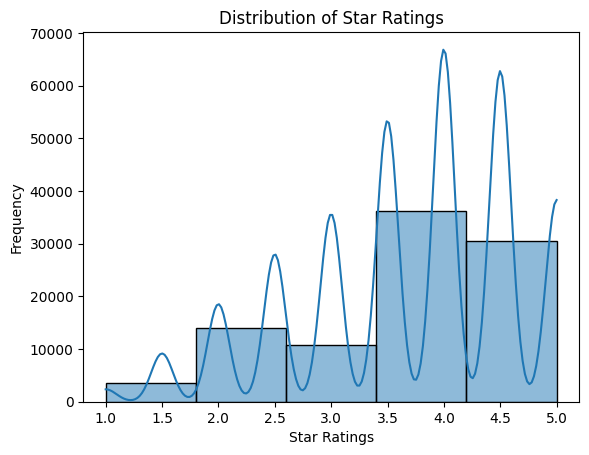

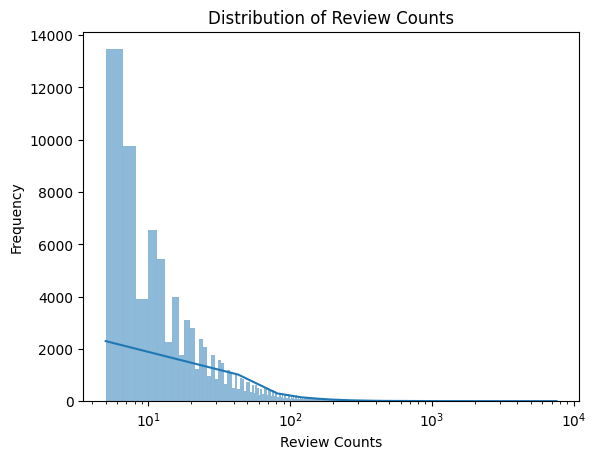

In [46]:

sns.histplot(bus_open['stars'], bins=5, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Frequency')
plt.show()

sns.histplot(bus_open['review_count'], kde=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Counts')
plt.ylabel('Frequency')
plt.xscale('log') 
plt.show()


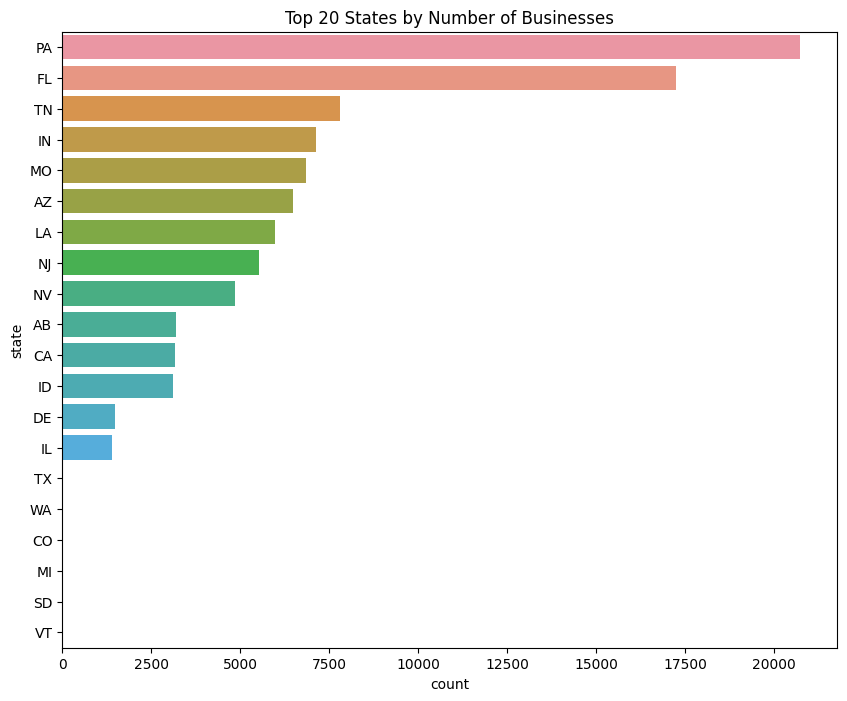

In [47]:
plt.figure(figsize=(10, 8))
sns.countplot(y='state', data=bus_open, order=bus_open['state'].value_counts().index[:20])
plt.title('Top 20 States by Number of Businesses')
plt.show()

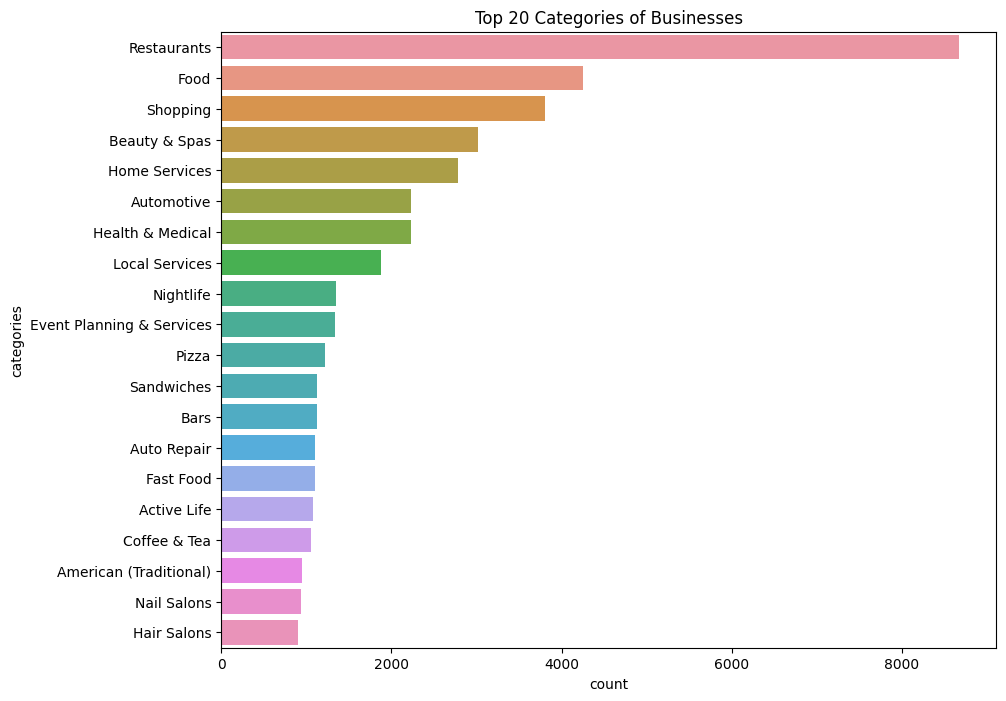

In [48]:
plt.figure(figsize=(10, 8))
sns.countplot(y='categories', data=bus_open, order=bus_open['categories'].value_counts().index[:20])
plt.title('Top 20 Categories of Businesses')
plt.show()


Star Ratings vs. Review Counts

Explore if there's a relationship between the number of reviews a business has and its average star rating.

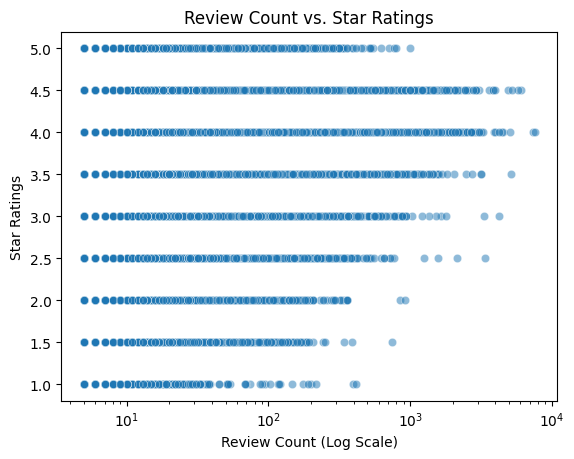

In [49]:
sns.scatterplot(x='review_count', y='stars', data=bus_open, alpha=0.5)
plt.xscale('log') 
plt.title('Review Count vs. Star Ratings')
plt.xlabel('Review Count (Log Scale)')
plt.ylabel('Star Ratings')
plt.show()


Investigate if certain categories of businesses tend to have higher or lower average star ratings.

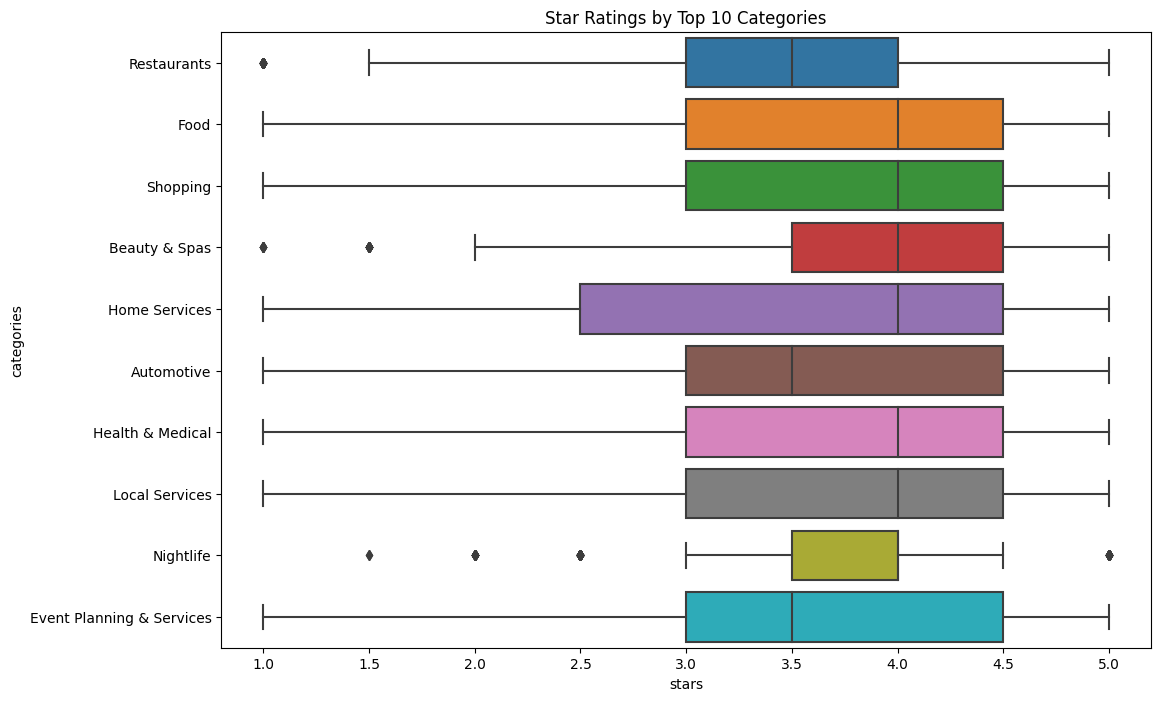

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='stars', y='categories', data=bus_open, order=bus_open['categories'].value_counts().index[:10])
plt.title('Star Ratings by Top 10 Categories')
plt.show()


### Association Rule

In [51]:
bus_cat = bus_open[['business_id','categories']]
user_id_name = user_df[['user_id', 'name']]
review_id = review_df[['user_id', 'business_id']]

In [52]:
cat_id = bus_cat.merge(review_id, how = 'left', on = 'business_id')
cat_id = cat_id[['user_id','categories']]

In [53]:
cat_group = cat_id.groupby('user_id')['categories'].apply(list)
cat_group = pd.DataFrame(cat_group).reset_index()
cat_group

,user_id,categories
0,---1lKK3aKOuomHnwAkAow,[Doctors]
1,---2PmXbF47D870stH1jqA,"[Mexican, Food, Hair Salons, Tires, Breweries,..."
2,---UgP94gokyCDuB5zUssA,"[German, Juice Bars & Smoothies, Vegan, Sports..."
3,---fa6ZK37T9NjkGKI4oSg,[Home & Garden]
4,---r61b7EpVPkb4UVme5tA,"[Pizza, Pizza, Junk Removal & Hauling, Contrac..."
...,...,...
1713476,zzz-M4QvkEpUWWPL9RTzLA,"[Food, Fashion, Delis, Hair Salons]"
1713477,zzzCg-_lpyYE82TlJCdwdw,[Salad]
1713478,zzzGgfvrSJ4AQeKtcgocIw,[Restaurants]
1713479,zzzMBVS73g3ZJ7qL8JyhiA,[Nightlife]


In [57]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [61]:
resto = cat_group['categories']
resto

0                                                  [Doctors]
1          [Mexican, Food, Hair Salons, Tires, Breweries,...
2          [German, Juice Bars & Smoothies, Vegan, Sports...
3                                            [Home & Garden]
4          [Pizza, Pizza, Junk Removal & Hauling, Contrac...
                                 ...                        
1713476                  [Food, Fashion, Delis, Hair Salons]
1713477                                              [Salad]
1713478                                        [Restaurants]
1713479                                          [Nightlife]
1713480                                 [Breakfast & Brunch]
Name: categories, Length: 1713481, dtype: object

In [62]:
te = TransactionEncoder()
te_data = te.fit(resto).transform(resto)
df_trans = pd.DataFrame(te_data, columns=te.columns_)
df_trans

,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Adoption Services,Adult,...,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yoga,Ziplining,Zoos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1713477,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1713478,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1713479,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
